### Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Unzip Dataset

In [ ]:
!unzip -uq '/content/gdrive/MyDrive/Calorties/Datasets.zip' -d '/content/gdrive/MyDrive/Calorties'

###Menampilkan isi file Calorties

In [ ]:
! ls /content/gdrive/MyDrive/Calorties

Datasets.zip  test  train  validation


###Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping

###Dataset Directory

In [ ]:
data_set = '/content/gdrive/MyDrive/Calorties'
train_set = '/content/gdrive/MyDrive/Calorties/train'
val_set = '/content/gdrive/MyDrive/Calorties/validation'
test_set = '/content/gdrive/MyDrive/Calorties/test'

### Data Preprocessing

In [ ]:
training_generator = tf.keras.preprocessing.image_dataset_from_directory(train_set,
                                                               seed = 2509,
                                                               image_size = (150, 150),
                                                               shuffle = True,
                                                               batch_size = 32)
validation_generator = tf.keras.preprocessing.image_dataset_from_directory(val_set,
                                                               seed = 2509,
                                                               image_size = (150, 150),
                                                               shuffle=  False,
                                                               batch_size = 32)
testing_generator = tf.keras.preprocessing.image_dataset_from_directory(test_set,
                                                              seed = 2509,
                                                              image_size = (150, 150),
                                                              shuffle = False,
                                                              batch_size= 32)

Found 1725 files belonging to 20 classes.
Found 195 files belonging to 20 classes.
Found 199 files belonging to 20 classes.


In [ ]:

print('total training fruits and vegetables images: ', len(os.listdir(train_set)))
print('total validation fruits and vegetables images: ', len(os.listdir(val_set)))
print('total teseting fruits and vegetables images: ', len(os.listdir(test_set)))


total training fruits and vegetables images:  20
total validation fruits and vegetables images:  20
total teseting fruits and vegetables images:  20


In [ ]:
train_file = os.listdir( train_set )
print(train_file)


['apple', 'banana', 'beetroot', 'cabbage', 'carrot', 'corn', 'cucumber', 'grapes', 'kiwi', 'lemon', 'lettuce', 'mango', 'orange', 'pear', 'pineapple', 'pomegranate', 'potato', 'spinach', 'tomato', 'watermelon']


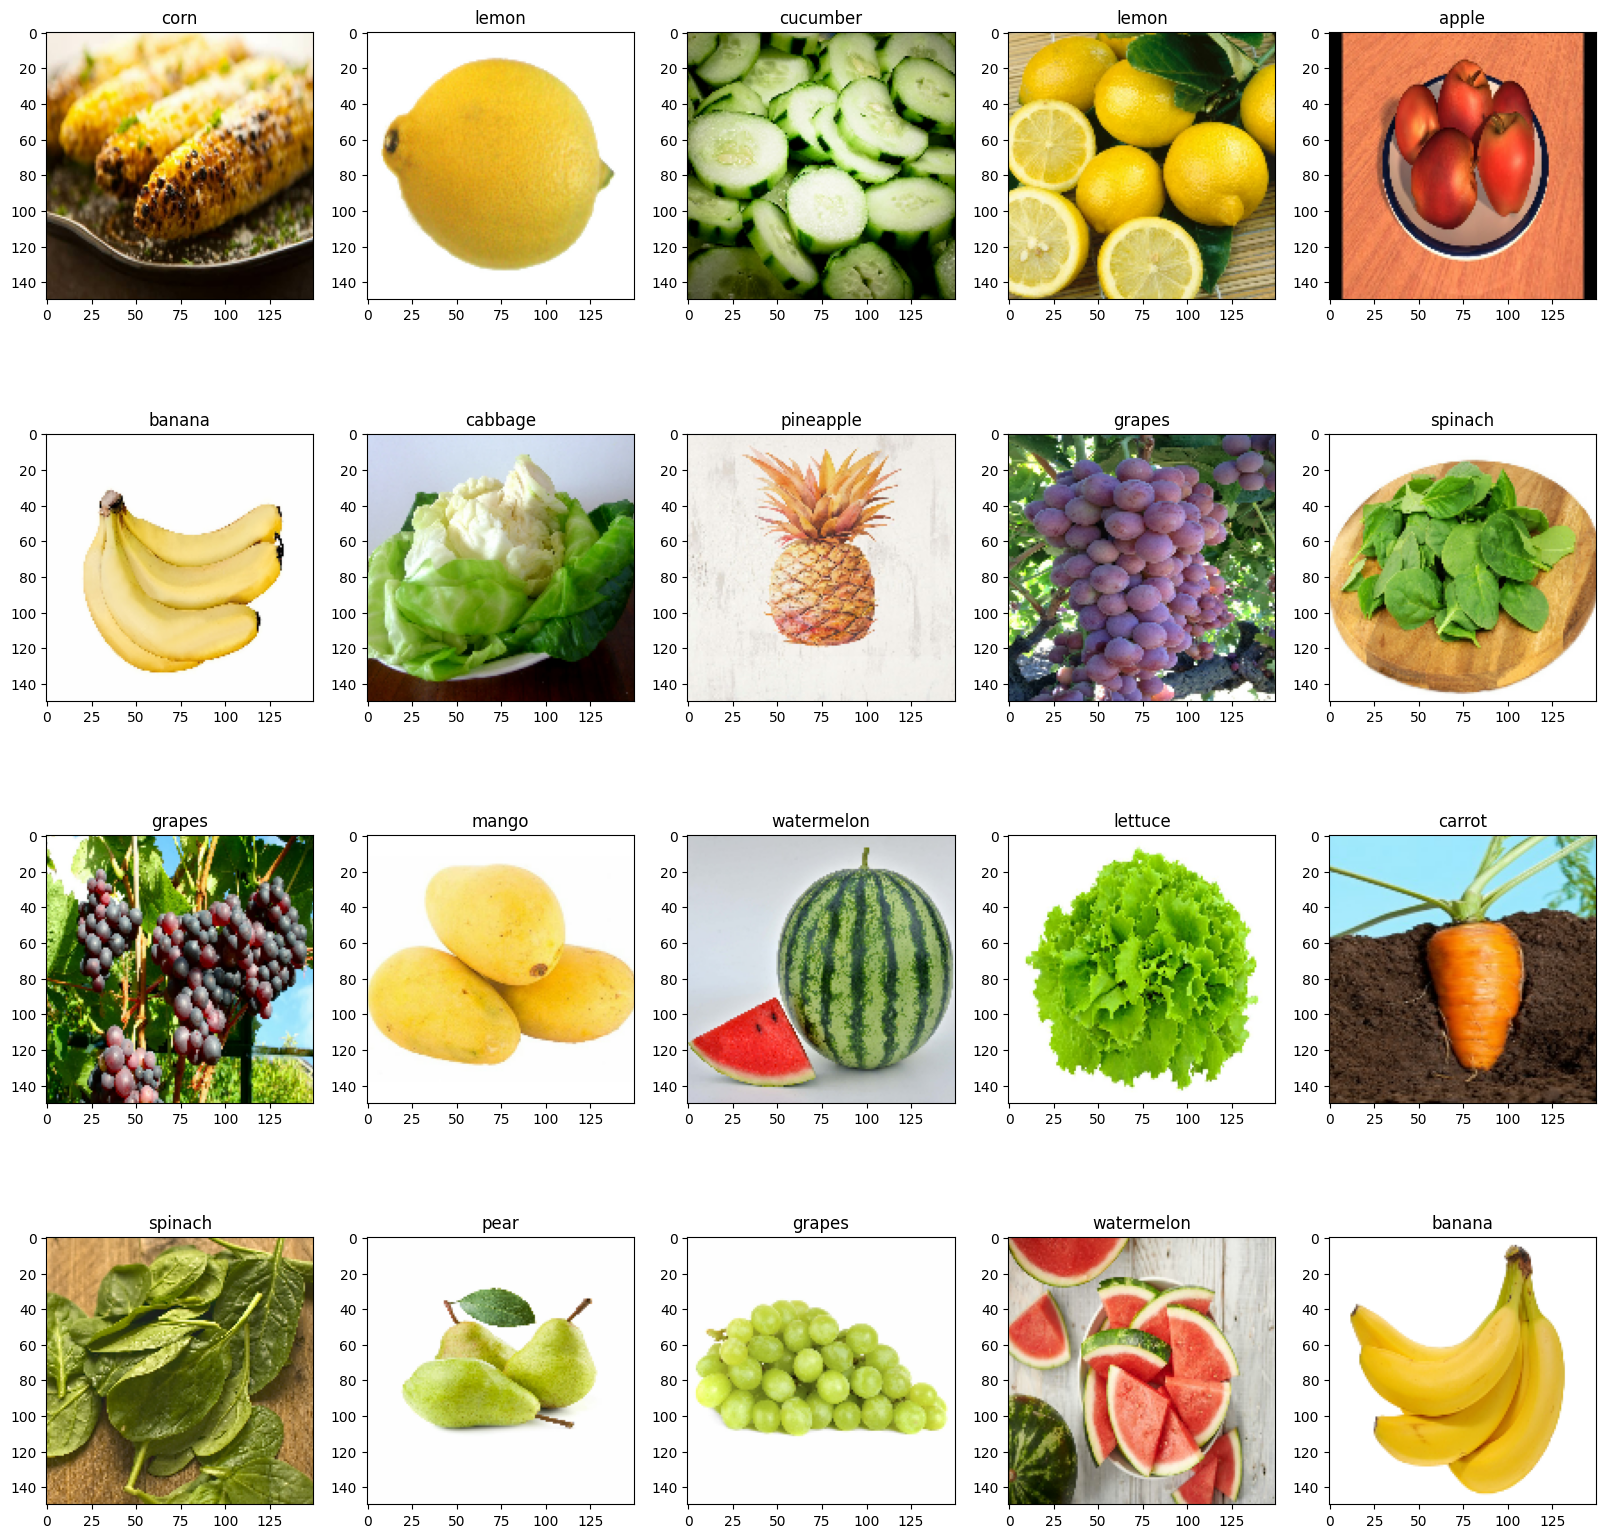

In [ ]:
plt.figure(figsize=(20,20))
for images, labels in training_generator.take(1):
    for i in range(20):
        x = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_file[labels[i]])
        plt.axis('on')

### Build Model Implementation

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3,2), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128, (3,2), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(96, (3,2), activation = 'relu'),
      #tf.keras.layers.MaxPooling2D(2, 2),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(32, (3,2), activation = 'relu'),
      #tf.keras.layers.MaxPooling2D(2, 2),
      #tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(len(train_file),activation='softmax')
  ])
  model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ["accuracy"])

  return model

###Model Architecture

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 73, 64)        12352     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

###Training Model

In [ ]:
history = model.fit(x=training_generator,
                    epochs= 20,
                    validation_data=validation_generator)

Epoch 1/20
54/54 [==============================] - 280s 5s/step - loss: 2.6964 - accuracy: 0.2951 - val_loss: 2.2679 - val_accuracy: 0.3641
Epoch 2/20
54/54 [==============================] - 124s 2s/step - loss: 0.7245 - accuracy: 0.7867 - val_loss: 1.3842 - val_accuracy: 0.5949
Epoch 3/20
54/54 [==============================] - 126s 2s/step - loss: 0.2658 - accuracy: 0.9472 - val_loss: 0.5622 - val_accuracy: 0.8821
Epoch 4/20
54/54 [==============================] - 123s 2s/step - loss: 0.1208 - accuracy: 0.9826 - val_loss: 0.2819 - val_accuracy: 0.9538
Epoch 5/20
54/54 [==============================] - 124s 2s/step - loss: 0.0553 - accuracy: 0.9965 - val_loss: 0.2251 - val_accuracy: 0.9641
Epoch 6/20
54/54 [==============================] - 122s 2s/step - loss: 0.0383 - accuracy: 0.9959 - val_loss: 0.2060 - val_accuracy: 0.9641
Epoch 7/20
54/54 [==============================] - 127s 2s/step - loss: 0.0258 - accuracy: 0.9983 - val_loss: 0.2010 - val_accuracy: 0.9641
Epoch 8/20
54

###Visualize Accuracy and Loss

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))

Text(0.5, 1.0, 'Training and validation accuracy')

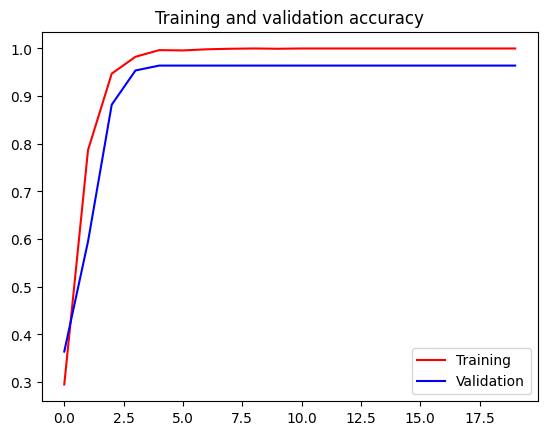

In [ ]:
plt.plot  ( epochs, acc, 'r', label='Training')
plt.plot  ( epochs, val_acc, 'b', label='Validation')

plt.legend()
plt.title ('Training and validation accuracy')

Text(0.5, 1.0, 'Training and validation loss')

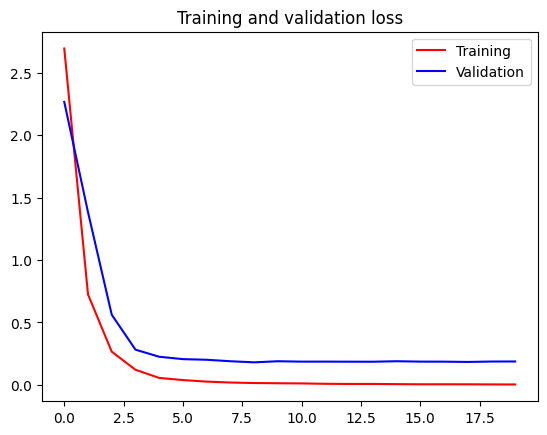

In [ ]:
plt.plot  ( epochs, loss, 'r', label='Training')
plt.plot  ( epochs, val_loss, 'b', label='Validation')
plt.legend()
plt.title ('Training and validation loss')

###Probability Distribution

In [ ]:
predictions = model.predict(validation_generator, verbose=1)

7/7 [==============================] - 8s 977ms/step


In [ ]:
predictions.shape

(195, 20)

In [ ]:
np.sum(predictions[0])

0.9999998

In [ ]:
predictions[0]

array([9.9993104e-01, 1.7195418e-09, 2.1599713e-05, 2.1653964e-08,
       3.4405732e-06, 1.5770588e-07, 7.3338224e-10, 1.6186318e-06,
       2.6154813e-08, 8.4619289e-09, 8.6318169e-10, 5.5314666e-07,
       4.9712486e-07, 7.0847218e-06, 8.3831040e-08, 3.1796941e-07,
       1.9434579e-05, 7.3393418e-12, 6.9243474e-06, 7.0890405e-06],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.12515305, 0.04604441, 0.0460454 , 0.04604441, 0.04604457,
       0.04604442, 0.04604441, 0.04604448, 0.04604441, 0.04604441,
       0.04604441, 0.04604444, 0.04604443, 0.04604474, 0.04604441,
       0.04604442, 0.0460453 , 0.04604441, 0.04604473, 0.04604474],
      dtype=float32)>

###Model Evaluate

In [ ]:
model.evaluate(testing_generator)

7/7 [==============================] - 26s 4s/step - loss: 0.1835 - accuracy: 0.9648


[0.1834924966096878, 0.9648241400718689]

### Save Model

In [ ]:
saved_model_path = "./Calorties.h5"

model.save(saved_model_path)

### Convert to TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

calorties_tflite_model = converter.convert()

In [ ]:
import pathlib
from google.colab import files
tflite_calorties_file = pathlib.Path('./Calorties.tflite')
tflite_calorties_file.write_bytes(calorties_tflite_model)
files.download(tflite_calorties_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>